In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v7/v7_1/V7_after_eda_data.xlsx')

In [4]:
data[data['WriteOff_YN']==1].describe()

,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,NumberOfBankStatements,...,Paybackamount,WriteOff_YN,FundedWriteOffAmount_Gross,WOGross_AdvanceBalance,NetWO,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,Is_this_Business_home_based__c_Yes
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,7.750000e+02,7.750000e+02,775.000000,775.000000,...,775.000000,775.0,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,98.649006,0.694271,1.966452,3.117419,2.024516,24.684516,7.424639e+04,1.226240e+04,0.055484,2.975484,...,35892.596994,1.0,9326.543084,20326.675355,7596.540581,0.964086,1.131613,0.032829,0.174917,0.443871
std,5.151006,0.240169,1.586086,7.511603,1.354738,37.843553,4.906740e+05,1.139590e+05,0.310485,0.901144,...,76095.478096,0.0,23502.310275,45444.896974,20791.087722,2.045123,2.760129,0.739044,0.262301,0.497160
min,52.390000,0.000000,1.000000,0.000000,1.000000,0.000000,-9.592692e+04,-6.220267e+04,0.000000,0.000000,...,2980.000000,1.0,0.000000,0.200000,0.000000,0.000000,0.000000,-10.114075,-0.195982,0.000000
25%,100.000000,0.540000,1.000000,0.000000,1.000000,7.400000,1.677700e+04,1.931955e+03,0.000000,3.000000,...,8940.000000,1.0,1107.020000,4990.295000,0.000000,0.000000,0.000000,-0.047602,0.062609,0.000000
50%,100.000000,0.630000,1.000000,0.000000,2.000000,18.430000,2.474676e+04,3.404000e+03,0.000000,3.000000,...,14900.000000,1.0,3713.020000,8679.250000,2262.380000,0.000000,0.000000,0.086233,0.114464,0.000000
75%,100.000000,0.840000,2.000000,3.000000,3.000000,30.805000,4.629716e+04,6.444530e+03,0.000000,4.000000,...,29800.000000,1.0,8747.725000,18062.845000,7446.170000,0.750000,1.000000,0.260180,0.201052,1.000000
max,100.000000,1.770000,14.000000,79.000000,13.000000,736.300000,1.241704e+07,3.129067e+06,4.000000,5.000000,...,922891.100000,1.0,317759.340000,526048.400000,317759.340000,16.250000,20.000000,7.308505,5.121541,1.000000


In [5]:
data[data['WriteOff_YN']==0].describe()

,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,NumberOfBankStatements,...,Paybackamount,WriteOff_YN,FundedWriteOffAmount_Gross,WOGross_AdvanceBalance,NetWO,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,Is_this_Business_home_based__c_Yes
count,2283.000000,2283.000000,2283.000000,2283.000000,2283.000000,2283.000000,2.283000e+03,2283.000000,2283.000000,2283.000000,...,2.283000e+03,2283.0,2283.0,2283.000000,2283.0,2283.000000,2283.000000,2283.000000,2283.000000,2283.000000
mean,98.505011,0.746159,2.263250,2.744196,2.011389,33.664779,5.361167e+04,8893.743254,0.028909,3.032413,...,3.049951e+04,0.0,0.0,6781.503561,0.0,0.923836,0.984669,-1.239909,0.293741,0.434954
std,6.025599,0.243553,1.737707,7.305066,1.329188,252.617605,1.505054e+05,28079.754004,0.184989,0.927145,...,6.746273e+04,0.0,0.0,24159.974192,0.0,2.281611,2.674290,37.165134,3.142706,0.495860
min,34.480000,0.000000,1.000000,0.000000,1.000000,0.000000,-3.078490e+03,-137533.050000,0.000000,0.000000,...,2.546410e+03,0.0,0.0,0.000000,0.0,0.000000,0.000000,-1572.231817,-0.191478,0.000000
25%,100.000000,0.560000,1.000000,0.000000,1.000000,8.730000,1.523903e+04,1713.860000,0.000000,3.000000,...,8.940000e+03,0.0,0.0,0.000000,0.0,0.000000,0.000000,-0.071352,0.064599,0.000000
50%,100.000000,0.700000,2.000000,0.000000,2.000000,19.870000,2.474676e+04,3404.000000,0.000000,3.000000,...,1.490000e+04,0.0,0.0,1711.500000,0.0,0.000000,0.000000,0.086233,0.122167,0.000000
75%,100.000000,0.920000,3.000000,2.000000,3.000000,34.645000,4.227664e+04,6208.195000,0.000000,4.000000,...,2.702488e+04,0.0,0.0,6258.000000,0.0,0.666666,0.000000,0.243387,0.223940,1.000000
max,100.000000,2.150000,13.000000,83.000000,15.000000,11539.840000,2.781368e+06,739763.000000,2.000000,5.000000,...,1.400000e+06,0.0,0.0,700000.000000,0.0,34.000000,34.000000,1.220451,145.707261,1.000000


In [6]:
data_val = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v7/v7_1/V7_val_data_after_eda.xlsx')

In [7]:
data.shape

(3058, 29)

In [8]:
data_val.shape

(484, 29)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   OpportunityID                          3058 non-null   object 
 1   Renewal_PreviousPace                   3058 non-null   float64
 2   Renewal_PreviousPaidPercentageOfRTR    3058 non-null   float64
 3   Renewal_CountPreviousDeals             3058 non-null   int64  
 4   Renewal_PreviousCountBounces           3058 non-null   int64  
 5   Renewal_PreviousPosition               3058 non-null   int64  
 6   Renewal_PreviousHBwLCF                 3058 non-null   float64
 7   Renewal_PreviousAvgMonthRevenue        3058 non-null   float64
 8   Renewal_PreviousAvgDailyBalance        3058 non-null   float64
 9   Renewal_TwoWeekBounces                 3058 non-null   int64  
 10  NumberOfBankStatements                 3058 non-null   int64  
 11  Bank

In [10]:
data.corr()['WriteOff_YN'].sort_values()

Time_in_Business__c                     -0.108562
Renewal_PreviousPaidPercentageOfRTR     -0.092625
Renewal_CountPreviousDeals              -0.075722
Credit_Score__c                         -0.060429
NumberOfBankStatements                  -0.026897
HB_with_LCF_Payment__c                  -0.020211
PctAvgDailybalance2AvgMonthlyDeposits   -0.019012
Renewal_PreviousHBwLCF                  -0.017829
BankStatement_MA_NumReturnItems         -0.001407
Renewal_PreviousPosition                 0.004276
AvgDailybalance                          0.006210
Is_this_Business_home_based__c_Yes       0.007819
Avg_ReturnItemdays                       0.007874
Renewal_PreviousPace                     0.010771
AvgMonthlydeposits                       0.012271
PctChangeInReveune                       0.017240
Renewal_PreviousCountBounces             0.022066
Renewal_PreviousAvgDailyBalance          0.023531
LatestMonth_ReturnItemDays               0.023707
FundedAmount                             0.031039


In [11]:
data.drop(['NetWO','FundedWriteOffAmount_Gross','WOGross_AdvanceBalance'],axis = 1).corr()['WriteOff_YN'].sort_values()

Time_in_Business__c                     -0.108562
Renewal_PreviousPaidPercentageOfRTR     -0.092625
Renewal_CountPreviousDeals              -0.075722
Credit_Score__c                         -0.060429
NumberOfBankStatements                  -0.026897
HB_with_LCF_Payment__c                  -0.020211
PctAvgDailybalance2AvgMonthlyDeposits   -0.019012
Renewal_PreviousHBwLCF                  -0.017829
BankStatement_MA_NumReturnItems         -0.001407
Renewal_PreviousPosition                 0.004276
AvgDailybalance                          0.006210
Is_this_Business_home_based__c_Yes       0.007819
Avg_ReturnItemdays                       0.007874
Renewal_PreviousPace                     0.010771
AvgMonthlydeposits                       0.012271
PctChangeInReveune                       0.017240
Renewal_PreviousCountBounces             0.022066
Renewal_PreviousAvgDailyBalance          0.023531
LatestMonth_ReturnItemDays               0.023707
FundedAmount                             0.031039


In [12]:
data.shape

(3058, 29)

### Model Training

In [14]:
X = data.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross',
              'NetWO','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyDeposits',
              'LatestMonth_ReturnItemDays','Avg_ReturnItemdays', 'WOGross_AdvanceBalance'],axis = 1)
y = data['WriteOff_YN']

In [13]:
# X = data.drop(['WriteOff_YN','OpportunityID',
#               'NetWO','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyDeposits',
#               'LatestMonth_ReturnItemDays','Avg_ReturnItemdays', 'WOGross_AdvanceBalance'],axis = 1)
# y = data['WriteOff_YN']

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Renewal_PreviousPace                 3058 non-null   float64
 1   Renewal_PreviousPaidPercentageOfRTR  3058 non-null   float64
 2   Renewal_CountPreviousDeals           3058 non-null   int64  
 3   Renewal_PreviousCountBounces         3058 non-null   int64  
 4   Renewal_PreviousPosition             3058 non-null   int64  
 5   Renewal_PreviousHBwLCF               3058 non-null   float64
 6   Renewal_PreviousAvgMonthRevenue      3058 non-null   float64
 7   Renewal_PreviousAvgDailyBalance      3058 non-null   float64
 8   Renewal_TwoWeekBounces               3058 non-null   int64  
 9   NumberOfBankStatements               3058 non-null   int64  
 10  BankStatement_MA_OverdraftDays       3058 non-null   float64
 11  BankStatement_MA_NumReturnItem

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [17]:
print('Shape of x_train is: {}'.format(X_train.shape))
print('Shape of x_test is: {}'.format(X_test.shape))
print('----------------------------------------------')
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (2446, 20)
Shape of x_test is: (612, 20)
----------------------------------------------
Shape of y_train is: (2446,)
Shape of y_test is: (612,)


In [18]:
#checking the skewness
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_train).count(1)/len(y_train))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_train).count(0)/len(y_train)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [19]:
#checking the skewness
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_test).count(1)/len(y_test))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_test).count(0)/len(y_test)*100)))

Percentage of  having WriteOFF_YN = 1: 24.0%
Percentage of  having WriteOFF_YN = 0: 76.0%


In [ ]:
# # Use this cell when you want results on validation set and not test set
# X_test = data_val.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross',
#               'NetWO','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyDeposits',
#               'LatestMonth_ReturnItemDays','Avg_ReturnItemdays', 'WOGross_AdvanceBalance'],axis = 1)
# y_test = data_val['WriteOff_YN']

#XGBoost Parameters Explanation


1.   eta - Learning rate - Prevents overfitting - Default = 0.3 - Range = [0,1]
2.   gamma - min_split_loss - Min loss reduction for a further partition - default = 0 - range = [0,infinity] (Higher gamma value means smaller loss reduction which means more splits. As a result, more conservative model,chances of improvement in accuracy.Higher values can also cause overfitting).
3.  lambda - L2 regularisation - default=1 - Higher value means more conservative model, likely to overfit
4. alpha - L1 regularization - default=0 - Higher values lead to more conservative model, likely to overfit 
5. scale_pos_weight - default=1 - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).









In [ ]:
# quantile_1 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.25)
# quantile_1

1107.02

In [ ]:
# quantile_2 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.5)
# quantile_2

3713.02

In [ ]:
# quantile_3 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.75)
# quantile_3

8747.725

In [ ]:
# weight = []
# for i in data.index:
#   if data['WriteOff_YN'][i] == 0:
#     weight.append(1.0)
#   else:
#     if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
#       weight.append(1.25)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
#       weight.append(1.5)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
#       weight.append(2.0)
#     else:
#       weight.append(2.25)

# weight = np.array(weight)
# len(weight)

2446

In [ ]:
# data[(data['FundedWriteOffAmount_Gross'] >= quantile_2) & (data['FundedWriteOffAmount_Gross'] < quantile_3)]

In [20]:
median_WO = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].median()
median_WO

3713.02

In [21]:
weight = []
for i in data.index:
  if data['FundedWriteOffAmount_Gross'][i] > median_WO:
    weight.append(2)
  else:
    weight.append(1)
weight = np.array(weight)
len(weight)

3058

In [ ]:
# Ask question regarding length of sample_weight list to raghav sir
# X_train = X_train.drop(['FundedWriteOffAmount_Gross'],axis = 'columns')
# X_test = X_test.drop(['FundedWriteOffAmount_Gross'],axis = 'columns')

In [ ]:
# L1 = 0
# L2 = 10
# lr = 0.3

In [24]:
parameters = {
    'eval_metric':['aucpr'],
    'use_label_encoder':[False],
    'n_estimators':[1,5,10,15,20,25,30,40], # number of decision trees used in Xgboost model
    'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10], # used to tackle unbalanced datasets(same as upsampling, SMOTE,etc)
    'subsample':[0.3,0.75], # how much % of data you are taking for estimator building.
    'reg_alpha':[0],
    'reg_lambda':[0.02], #perform L2 regularization on leaf weights(tackle overfitting)(control how deep a tree can grow)
    'learning_rate':[0.3], # Learning rate(new weight updation after every epoch in a conservative manner)
    'gamma':[0.25], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'colsample_bynode':[1]
} 

In [25]:
from datetime import datetime as dt
start = dt.now()
x_cfl = XGBClassifier(objective='binary:logistic') #initializing xgboost model

clf = GridSearchCV(estimator=x_cfl, 
                   param_grid=parameters, 
                   scoring='roc_auc',
                   n_jobs=-1, 
                   cv=5, 
                   return_train_score=True)

clf.fit(X_train,y_train,sample_weight = weight)
running_secs = (dt.now() - start).seconds
running_secs

26

In [26]:
# best parameters after training
clf.best_estimator_

XGBClassifier(eval_metric='aucpr', gamma=0.25, learning_rate=0.3,
              n_estimators=25, reg_lambda=0.02, scale_pos_weight=8,
              subsample=0.3, use_label_encoder=False)

In [27]:
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'aucpr',
 'gamma': 0.25,
 'learning_rate': 0.3,
 'n_estimators': 25,
 'reg_alpha': 0,
 'reg_lambda': 0.02,
 'scale_pos_weight': 8,
 'subsample': 0.3,
 'use_label_encoder': False}

In [28]:
predict_y_test = clf.predict(X_test)
predict_y_proba_test = clf.predict_proba(X_test)
predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)

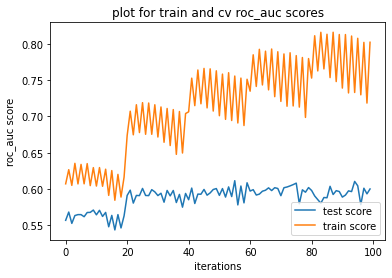

In [29]:
#here test score refers to the cv score
x_axis = [i for i in range(100)]
plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
plt.legend(["test score", "train score"], loc ="lower right")
plt.xlabel('iterations')
plt.ylabel('roc_auc score')
plt.title('plot for train and cv roc_auc scores')
plt.show()

In [30]:
from sklearn.metrics import precision_score,recall_score

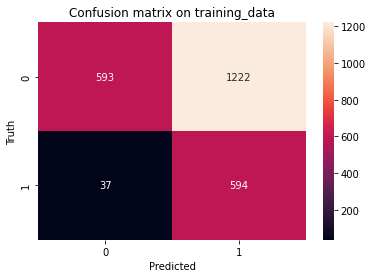

----------------------------
TP: 594
TN: 593
FP: 1222
FN: 37
F1-score: 0.4854924397221087
accuracy: 0.48528209321340965
Precision: 0.32709251101321585
Recall: 0.9413629160063391


In [31]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

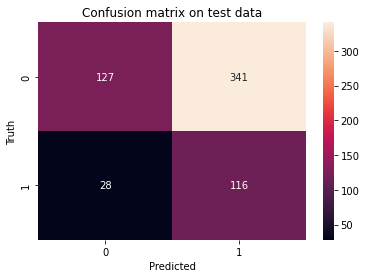

----------------------------
----------------------------
TP: 116
TN: 127
FP: 341
FN: 28
----------------------------
F1-score: 0.38602329450915146
accuracy: 0.39705882352941174
Precision: 0.2538293216630197
Recall: 0.8055555555555556


In [32]:
# on test set 
sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

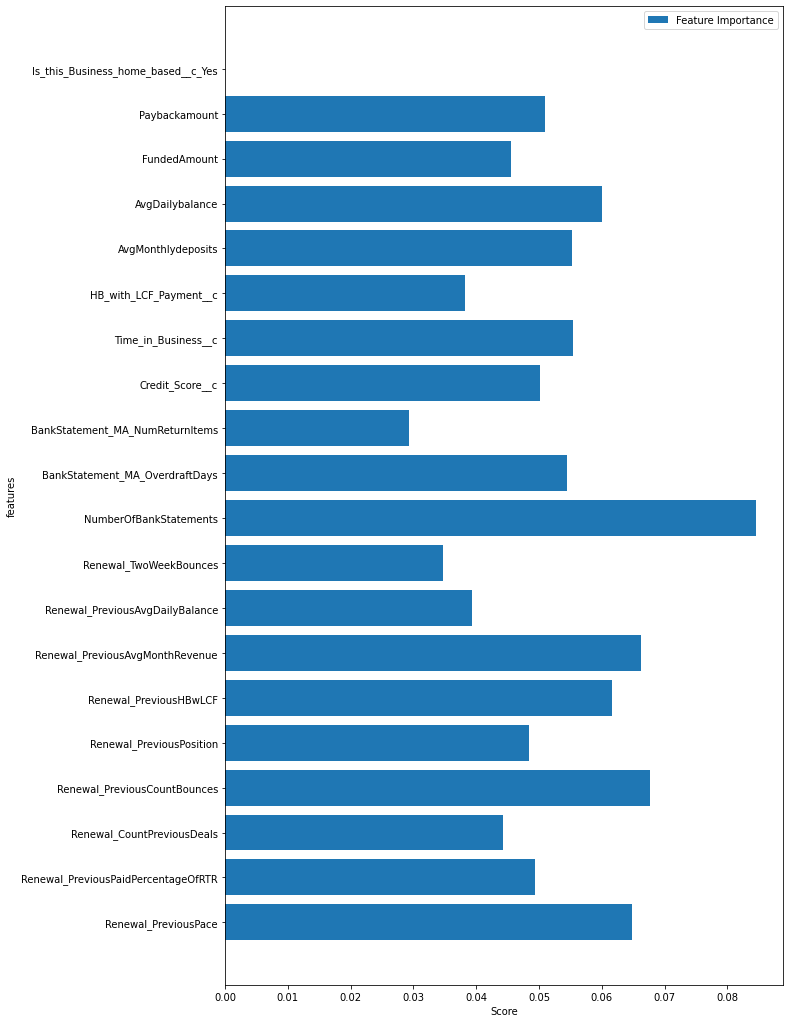

In [33]:
# check for feature importance
features = X_train.columns
features
gain = clf.best_estimator_.feature_importances_
plt.figure(figsize = (10, 18))
plt.barh(features , gain)
plt.xlabel("Score")
plt.ylabel("features")
plt.legend(["Feature Importance"])
plt.show()

# For Train data

In [34]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
2320,0
2030,1
1373,0
351,0
2916,0
...,...
1638,0
1095,0
1130,0
1294,0


In [35]:
check['Predicted Values'] = predict_y_train

In [36]:
check

,WriteOff_YN,Predicted Values
2320,0,1
2030,1,1
1373,0,1
351,0,0
2916,0,1
...,...,...
1638,0,1
1095,0,1
1130,0,0
1294,0,1


In [37]:
predict_y_proba_train

array([[0.13801736, 0.86198264],
       [0.3254307 , 0.6745693 ],
       [0.33096445, 0.66903555],
       ...,
       [0.65115726, 0.3488427 ],
       [0.09391308, 0.9060869 ],
       [0.5118021 , 0.48819795]], dtype=float32)

In [38]:
write_off1 = []
for i in predict_y_proba_train:
  write_off1.append(i[1])


In [39]:
check['Predicted_Prob_WO = 1'] = write_off1

In [40]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
2320,0,1,0.861983
2030,1,1,0.674569
1373,0,1,0.669036
351,0,0,0.201491
2916,0,1,0.773232
...,...,...,...
1638,0,1,0.737392
1095,0,1,0.890731
1130,0,0,0.348843
1294,0,1,0.906087


In [41]:
check['OpportunityID'] = None

In [42]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
2320,0,1,0.861983,0062M00000mzf3qQAA
2030,1,1,0.674569,0062M00000o7zzhQAA
1373,0,1,0.669036,0062M00000kzXxRQAU
351,0,0,0.201491,0062M00000eOmM3QAK
2916,0,1,0.773232,0062M00000nYcbKQAS
...,...,...,...,...
1638,0,1,0.737392,0062M00000lWDr6QAG
1095,0,1,0.890731,0062M00000j88nVQAQ
1130,0,0,0.348843,0062M00000jLLuyQAG
1294,0,1,0.906087,0062M00000kwjkPQAQ


In [44]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.9879909
Min_propability_value:  0.009500012


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [45]:
check['Pentile'] = None

In [46]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5 = 0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5 = 0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.80):
    d=5
    funded_amt_d5= funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
  
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
  check['Pentile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [47]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
2320,0,1,0.861983,0062M00000mzf3qQAA,5
2030,1,1,0.674569,0062M00000o7zzhQAA,3
1373,0,1,0.669036,0062M00000kzXxRQAU,3
351,0,0,0.201491,0062M00000eOmM3QAK,1
2916,0,1,0.773232,0062M00000nYcbKQAS,4
...,...,...,...,...,...
1638,0,1,0.737392,0062M00000lWDr6QAG,3
1095,0,1,0.890731,0062M00000j88nVQAQ,5
1130,0,0,0.348843,0062M00000jLLuyQAG,1
1294,0,1,0.906087,0062M00000kwjkPQAQ,5


In [48]:
check[check['Pentile'] == 1].sort_values(by='Predicted_Prob_WO = 1').head(20)

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
2265,0,0,0.009500,0062M00000mhcoQQAQ,1
1202,0,0,0.011433,0062M00000jxwDSQAY,1
1282,0,0,0.016102,0062M00000jyhpmQAA,1
1137,0,0,0.018180,0062M00000jLqruQAC,1
201,0,0,0.022560,0062M00000irgBbQAI,1
1333,0,0,0.029569,0062M00000kxnoqQAA,1
2968,0,0,0.031867,0062M00000nZ0n4QAC,1
1180,0,0,0.032847,0062M00000k0N3hQAE,1
2700,0,0,0.038649,0062M00000mUfn8QAC,1
1591,0,0,0.040621,0062M00000l02kTQAQ,1


In [49]:
check['Predicted_Prob_WO = 1'].max()

0.9879909

In [50]:
check['Predicted_Prob_WO = 1'].quantile(0.8)

0.8439440727233887

In [51]:
len(check[check['Pentile']==5])

489

In [52]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [53]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
2265,0,0,0.009500,0062M00000mhcoQQAQ,1
1202,0,0,0.011433,0062M00000jxwDSQAY,1
1282,0,0,0.016102,0062M00000jyhpmQAA,1
1137,0,0,0.018180,0062M00000jLqruQAC,1
201,0,0,0.022560,0062M00000irgBbQAI,1
...,...,...,...,...,...
2625,1,1,0.969945,0062M00000mT0sIQAS,5
2717,1,1,0.977059,0062M00000mUmFAQA0,5
2125,1,1,0.978514,0062M00000meXBHQA2,5
796,0,1,0.984427,0062M00000lpIzcQAE,5


In [54]:
# this will check nan values, missing_values by itself
check['Pentile'].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [55]:
exp_df = check.copy()

In [56]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
2265,0,0,0.009500,0062M00000mhcoQQAQ,1
1202,0,0,0.011433,0062M00000jxwDSQAY,1
1282,0,0,0.016102,0062M00000jyhpmQAA,1
1137,0,0,0.018180,0062M00000jLqruQAC,1
201,0,0,0.022560,0062M00000irgBbQAI,1
...,...,...,...,...,...
2625,1,1,0.969945,0062M00000mT0sIQAS,5
2717,1,1,0.977059,0062M00000mUmFAQA0,5
2125,1,1,0.978514,0062M00000meXBHQA2,5
796,0,1,0.984427,0062M00000lpIzcQAE,5


In [ ]:
# # sorted dataframe
# exp_df = exp_df.sort_values(by=['Predicted_Prob_WO = 1'], ascending = False)

In [57]:
len(exp_df[exp_df['Pentile']==1])

490

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [58]:
N = len(exp_df)
N

2446

In [59]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

631

In [60]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Pentile"] == 1]["WriteOff_YN"].value_counts()

0    474
1     16
Name: WriteOff_YN, dtype: int64

In [61]:
m_1 = len(exp_df[(exp_df["Pentile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Pentile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Pentile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Pentile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Pentile"] == 5) & (exp_df["WriteOff_YN"] ==1)])

In [62]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5

(16, 85, 137, 174, 219)

In [63]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5

In [64]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5

(16, 101, 238, 412, 631)

In [65]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Pentile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Pentile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Pentile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Pentile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Pentile"] == 5])

In [66]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5) 

3.2653061224489797 17.38241308793456 28.016359918200408 35.58282208588957 44.785276073619634


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile 
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles, 
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [67]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)

In [68]:
print(cg_1,cg_2,cg_3,cg_4,cg_5)

2.535657686212361 16.00633914421553 37.717908082408876 65.2931854199683 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses 

- The value of lift in case of good model should be high.s

In [69]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(20*1)
lift_2 = cg_2/(20*2)
lift_3 = cg_3/(20*3)
lift_4 = cg_4/(20*4)
lift_5 = cg_5/(20*5)
print(lift_1,lift_2,lift_3,lift_4,lift_5)

0.12678288431061807 0.4001584786053883 0.6286318013734813 0.8161648177496037 1.0


In [70]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5]

In [71]:
max_range = [exp_df[exp_df['Pentile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Pentile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Pentile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Pentile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Pentile']==5]['Predicted_Prob_WO = 1'].max()]
max_range

[0.44002563, 0.62184, 0.7511486, 0.8439441, 0.9879909]

In [72]:
min_range = [exp_df[exp_df['Pentile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Pentile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Pentile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Pentile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Pentile']==5]['Predicted_Prob_WO = 1'].min()]
min_range

[0.009500012, 0.4401096, 0.62234396, 0.75119305, 0.84399235]

In [73]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5]

In [74]:
no_of_opps = [len(exp_df[exp_df['Pentile']==1]),len(exp_df[exp_df['Pentile']==2]),len(exp_df[exp_df['Pentile']==3]),
              len(exp_df[exp_df['Pentile']==4]),len(exp_df[exp_df['Pentile']==5])]

In [75]:
no_of_opps

[490, 489, 489, 489, 489]

In [76]:
funded_amt

[9227470.0, 11084417.79, 10126133.0, 11196836.0, 12091878.93]

In [77]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.1717482 , 0.20631102, 0.18847475, 0.20840343, 0.2250626 ])

In [78]:
gross_amt

[59267.01, 701262.9999999999, 1181753.2699999998, 1500756.9, 2271797.95]

In [79]:
cum_gross_pct = []
for i in range(1,6):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.010370724183573684,
 0.13307988655139738,
 0.33986671814972297,
 0.6024737887020433,
 1.0]

In [80]:
gross_amt_pct = []
for i in range(5):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.006422888397361357,
 0.06326565935043124,
 0.11670331310086483,
 0.13403401639534596,
 0.18787799341619774]

In [81]:
dict_try = {"Pentile": [i for i in range(1,6)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WriteOff": rr,
            "Cumulative_Unit_WOs" : cg,
            'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded$':funded_amt_pct,
            'Funded_WO_Gross$':gross_amt,
            '%_Funded_WO_Gross$':gross_amt_pct,
            "Cumulative_$_WOs" :cum_gross_pct,
            'Min_Score': min_range,
            'Max_Score': max_range}

final_df = pd.DataFrame(dict_try)
final_df


,Pentile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,%_Funded$,Funded_WO_Gross$,%_Funded_WO_Gross$,Cumulative_$_WOs,Min_Score,Max_Score
0,1,490,16,3.265306,2.535658,0.126783,9227470.00,0.171748,59267.01,0.006423,0.010371,0.009500,0.440026
1,2,489,85,17.382413,16.006339,0.400158,11084417.79,0.206311,701263.00,0.063266,0.133080,0.440110,0.621840
2,3,489,137,28.016360,37.717908,0.628632,10126133.00,0.188475,1181753.27,0.116703,0.339867,0.622344,0.751149
3,4,489,174,35.582822,65.293185,0.816165,11196836.00,0.208403,1500756.90,0.134034,0.602474,0.751193,0.843944
4,5,489,219,44.785276,100.000000,1.000000,12091878.93,0.225063,2271797.95,0.187878,1.000000,0.843992,0.987991


In [82]:
final_df['%_Funded$'] = 100*final_df['%_Funded$']
final_df['%_Funded_WO_Gross$'] = 100*final_df['%_Funded_WO_Gross$']
final_df['Cumulative_$_WOs'] = 100*final_df['Cumulative_$_WOs']
final_df['Min_Score'] = 100 * final_df['Min_Score']
final_df['Max_Score'] = 100 * final_df['Max_Score']
final_df

,Pentile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,%_Funded$,Funded_WO_Gross$,%_Funded_WO_Gross$,Cumulative_$_WOs,Min_Score,Max_Score
0,1,490,16,3.265306,2.535658,0.126783,9227470.00,17.174820,59267.01,0.642289,1.037072,0.950001,44.002563
1,2,489,85,17.382413,16.006339,0.400158,11084417.79,20.631102,701263.00,6.326566,13.307989,44.010960,62.183998
2,3,489,137,28.016360,37.717908,0.628632,10126133.00,18.847475,1181753.27,11.670331,33.986672,62.234394,75.114861
3,4,489,174,35.582822,65.293185,0.816165,11196836.00,20.840343,1500756.90,13.403402,60.247379,75.119308,84.394409
4,5,489,219,44.785276,100.000000,1.000000,12091878.93,22.506260,2271797.95,18.787799,100.000000,84.399239,98.799095


Analyses from above DataFrame:
- %_Response_Rate - In decile_1 - 100% {231/231} of merchants are captured out of 
total_merchants (231 in that decile) who are likely stable merchants. Same goes with other deciles as well
- Cumulative_Gain - for 10% of merchant base (in each decile) - there are 23 (out of 58) responders (merchants) who are riskier 
- Similarly for 20 % of merchant base (2 deciles) - there are 28.38 % responses who are likely riskier merchants
- Lift - If we target the top 4 deciles, then we would target 40% of the merchants. In the same deciles, the cumulative % of responders is 56.1%. Hence, there is a lift of 1.40

<BarContainer object of 5 artists>

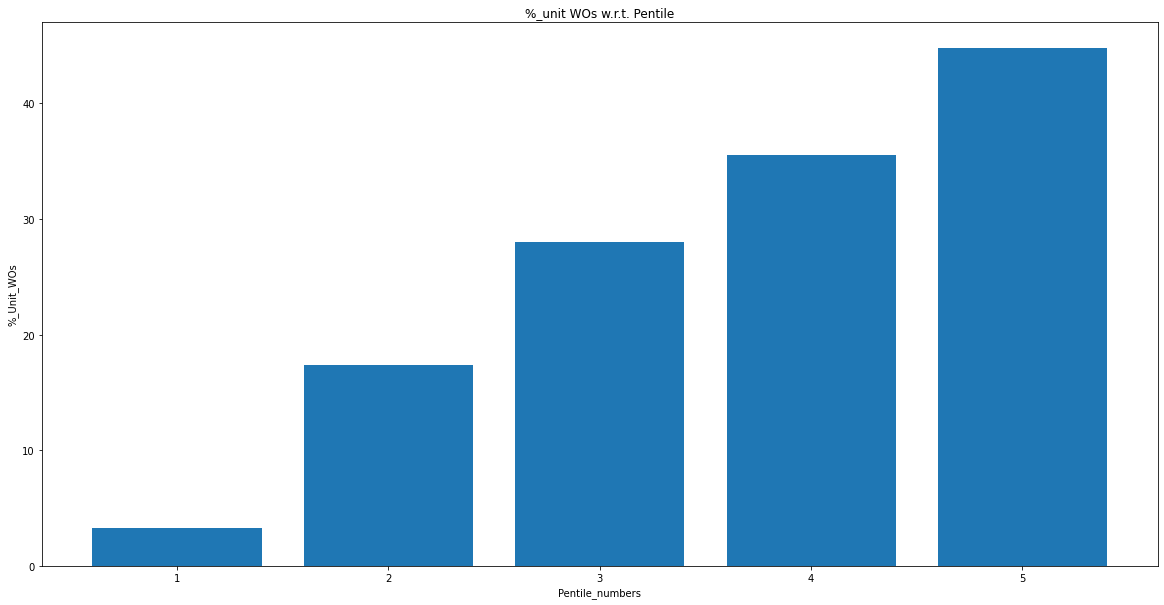

In [83]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Pentile")
plt.bar(final_df['Pentile'],final_df['%_Unit_WriteOff'])

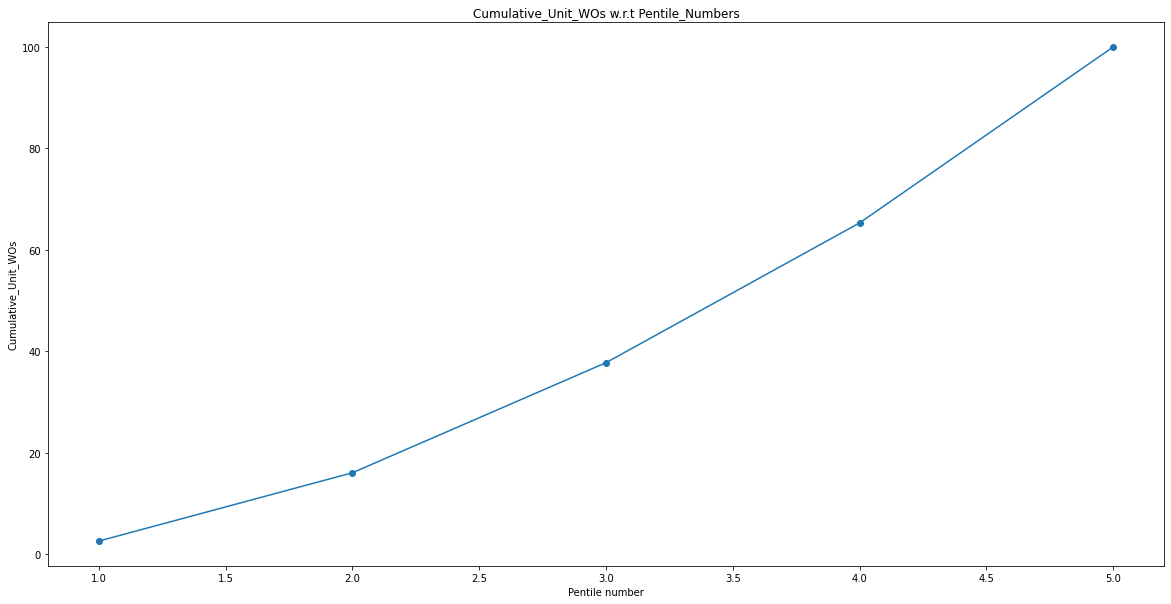

In [84]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Pentile_Numbers")
plt.plot(final_df["Pentile"], final_df['Cumulative_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

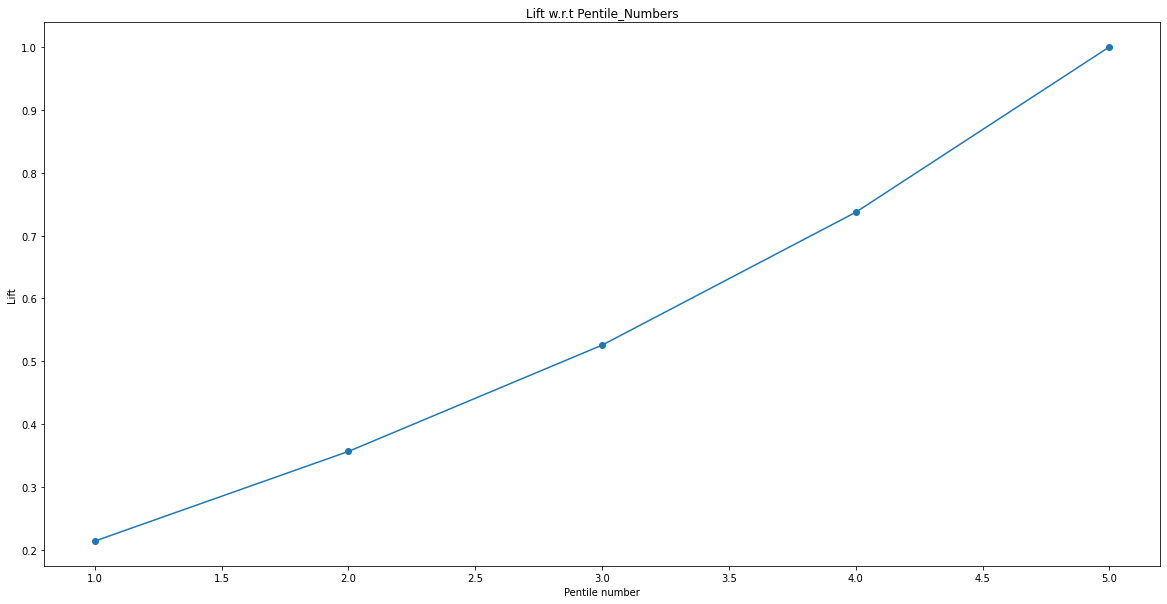

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile number")
plt.ylabel("Lift")
plt.title("Lift w.r.t Pentile_Numbers")
plt.plot(final_df["Pentile"], final_df['Lift'],marker='o')

# For Test data

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_test)
check

,WriteOff_YN
1764,0
203,0
1356,0
1451,0
1577,0
...,...
2776,1
2742,1
219,0
367,0


In [ ]:
check['Predicted Values'] = predict_y_test

In [ ]:
check

,WriteOff_YN,Predicted Values
1764,0,0
203,0,1
1356,0,1
1451,0,1
1577,0,0
...,...,...
2776,1,0
2742,1,1
219,0,1
367,0,0


In [ ]:
predict_y_proba_test

array([[0.529883  , 0.47011694],
       [0.46172905, 0.53827095],
       [0.32501853, 0.6749815 ],
       ...,
       [0.38082325, 0.61917675],
       [0.50654215, 0.49345785],
       [0.28310585, 0.71689415]], dtype=float32)

In [ ]:
write_off1 = []
for i in predict_y_proba_test:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
1764,0,0,0.470117
203,0,1,0.538271
1356,0,1,0.674981
1451,0,1,0.576190
1577,0,0,0.345141
...,...,...,...
2776,1,0,0.394795
2742,1,1,0.802049
219,0,1,0.619177
367,0,0,0.493458


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
1764,0,0,0.470117,0062M00000lxFzUQAU
203,0,1,0.538271,0062M00000irnyxQAA
1356,0,1,0.674981,0062M00000kyauvQAA
1451,0,1,0.576190,0062M00000kzSaSQAU
1577,0,0,0.345141,0062M00000lVWNeQAO
...,...,...,...,...
2776,1,0,0.394795,0062M00000nWl2HQAS
2742,1,1,0.802049,0062M00000mVDeGQAW
219,0,1,0.619177,0062M00000ib47KQAQ
367,0,0,0.493458,0062M00000ePWBBQA4


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.88115
Min_propability_value:  0.15485135


In [ ]:
# check.drop('Decile',axis = 'columns',inplace = True)

In [ ]:
check['Pentile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5 = 0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5 = 0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[4]:
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
  check['Pentile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
1764,0,0,0.470117,0062M00000lxFzUQAU,2
203,0,1,0.538271,0062M00000irnyxQAA,3
1356,0,1,0.674981,0062M00000kyauvQAA,4
1451,0,1,0.576190,0062M00000kzSaSQAU,3
1577,0,0,0.345141,0062M00000lVWNeQAO,1
...,...,...,...,...,...
2776,1,0,0.394795,0062M00000nWl2HQAS,1
2742,1,1,0.802049,0062M00000mVDeGQAW,5
219,0,1,0.619177,0062M00000ib47KQAQ,4
367,0,0,0.493458,0062M00000ePWBBQA4,2


In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
3048,1,0,0.154851,0062M00000mUJgRQAW,1
1637,0,0,0.157358,0062M00000lWdJyQAK,1
2210,0,0,0.175207,0062M00000mg7ZgQAI,1
2618,1,0,0.207075,0062M00000nGYaRQAW,1
2762,0,0,0.218015,0062M00000nWgyTQAS,1
...,...,...,...,...,...
2533,0,1,0.833795,0062M00000n2ZAvQAM,5
478,1,1,0.847589,0062M00000gZ78HQAS,5
93,0,1,0.869325,0062M00000dH8syQAC,5
2808,0,1,0.874668,0062M00000nX7MXQA0,5


In [ ]:
# this will check nan values, missing_values by itself
check['Pentile'].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
3048,1,0,0.154851,0062M00000mUJgRQAW,1
1637,0,0,0.157358,0062M00000lWdJyQAK,1
2210,0,0,0.175207,0062M00000mg7ZgQAI,1
2618,1,0,0.207075,0062M00000nGYaRQAW,1
2762,0,0,0.218015,0062M00000nWgyTQAS,1
...,...,...,...,...,...
2533,0,1,0.833795,0062M00000n2ZAvQAM,5
478,1,1,0.847589,0062M00000gZ78HQAS,5
93,0,1,0.869325,0062M00000dH8syQAC,5
2808,0,1,0.874668,0062M00000nX7MXQA0,5


In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
3048,1,0,0.154851,0062M00000mUJgRQAW,1
1637,0,0,0.157358,0062M00000lWdJyQAK,1
2210,0,0,0.175207,0062M00000mg7ZgQAI,1
2618,1,0,0.207075,0062M00000nGYaRQAW,1
2762,0,0,0.218015,0062M00000nWgyTQAS,1
...,...,...,...,...,...
2533,0,1,0.833795,0062M00000n2ZAvQAM,5
478,1,1,0.847589,0062M00000gZ78HQAS,5
93,0,1,0.869325,0062M00000dH8syQAC,5
2808,0,1,0.874668,0062M00000nX7MXQA0,5


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [ ]:
N = len(exp_df)
N

612

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

144

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Pentile"] == 1]["WriteOff_YN"].value_counts()

0    102
1     20
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Pentile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Pentile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Pentile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Pentile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Pentile"] == 5) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5

(20, 22, 36, 33, 33)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5

(20, 42, 78, 111, 144)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Pentile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Pentile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Pentile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Pentile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Pentile"] == 5])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5) 

16.39344262295082 16.176470588235293 25.174825174825173 29.72972972972973 33.0


In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5)

13.88888888888889 29.166666666666668 54.166666666666664 77.08333333333334 100.0


In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(20*1)
lift_2 = cg_2/(20*2)
lift_3 = cg_3/(20*3)
lift_4 = cg_4/(20*4)
lift_5 = cg_5/(20*5)

print(lift_1,lift_2,lift_3,lift_4,lift_5)

0.6944444444444444 0.7291666666666667 0.9027777777777778 0.9635416666666667 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Pentile']==1]),len(exp_df[exp_df['Pentile']==2]),len(exp_df[exp_df['Pentile']==3]),
              len(exp_df[exp_df['Pentile']==4]),len(exp_df[exp_df['Pentile']==5])]

In [ ]:
no_of_opps

[122, 136, 143, 111, 100]

In [ ]:
sum(no_of_opps)

612

In [ ]:
funded_amt

[1833050.0, 1727940.0, 2485475.0, 2144100.0, 4118789.92]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.1489152 , 0.14037616, 0.20191757, 0.17418459, 0.33460648])

In [ ]:
gross_amt

[143786.06,
 157237.11999999997,
 289266.14,
 183925.82000000004,
 739017.6200000002]

In [ ]:
cum_gross_pct = []
for i in range(1,6):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.09501912977353198,
 0.19892721592942508,
 0.390084946350223,
 0.5116299094661418,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(5):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.07844088268186901,
 0.0909968633170133,
 0.11638263913336486,
 0.08578229560188426,
 0.17942590769475328]

In [ ]:
dict_try = {"Pentile": [i for i in range(1,6)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WriteOff": rr,
            "Cumulative_Unit_WOs" : cg,
            'Lift': lift,
            'Funded_$':funded_amt,
            'Funded$_%':funded_amt_pct,
            'Funded_WO_Gross':gross_amt,
            'Funded_WO_Gross$_%':gross_amt_pct,
            "Cumulative_$ WOs" :cum_gross_pct,
            'Min_Score': min_range,
            'Max_Score': max_range}

final_df = pd.DataFrame(dict_try)
final_df


,Pentile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,Funded$_%,Funded_WO_Gross,Funded_WO_Gross$_%,Cumulative_$ WOs,Min_Score,Max_Score
0,1,122,20,16.393443,13.888889,0.694444,1833050.00,0.148915,143786.06,0.078441,0.095019,0.137538,0.415835
1,2,136,22,16.176471,29.166667,0.729167,1727940.00,0.140376,157237.12,0.090997,0.198927,0.415975,0.513673
2,3,143,36,25.174825,54.166667,0.902778,2485475.00,0.201918,289266.14,0.116383,0.390085,0.513707,0.602119
3,4,111,33,29.729730,77.083333,0.963542,2144100.00,0.174185,183925.82,0.085782,0.511630,0.602157,0.695811
4,5,100,33,33.000000,100.000000,1.000000,4118789.92,0.334606,739017.62,0.179426,1.000000,0.695929,0.895890


In [ ]:
final_df['Funded$_%'] = 100*final_df['Funded$_%']
final_df['Funded_WO_Gross$_%'] = 100*final_df['Funded_WO_Gross$_%']
final_df['Cumulative_$ WOs'] = 100*final_df['Cumulative_$ WOs']
final_df['Min_Score'] = 100 * final_df['Min_Score']
final_df['Max_Score'] = 100 * final_df['Max_Score']
final_df

,Pentile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,Funded$_%,Funded_WO_Gross,Funded_WO_Gross$_%,Cumulative_$ WOs,Min_Score,Max_Score
0,1,122,20,16.393443,13.888889,0.694444,1833050.00,14.891520,143786.06,7.844088,9.501913,13.753794,41.583488
1,2,136,22,16.176471,29.166667,0.729167,1727940.00,14.037616,157237.12,9.099686,19.892722,41.597515,51.367344
2,3,143,36,25.174825,54.166667,0.902778,2485475.00,20.191757,289266.14,11.638264,39.008495,51.370651,60.211945
3,4,111,33,29.729730,77.083333,0.963542,2144100.00,17.418459,183925.82,8.578230,51.162991,60.215706,69.581100
4,5,100,33,33.000000,100.000000,1.000000,4118789.92,33.460648,739017.62,17.942591,100.000000,69.592934,89.589027


<BarContainer object of 5 artists>

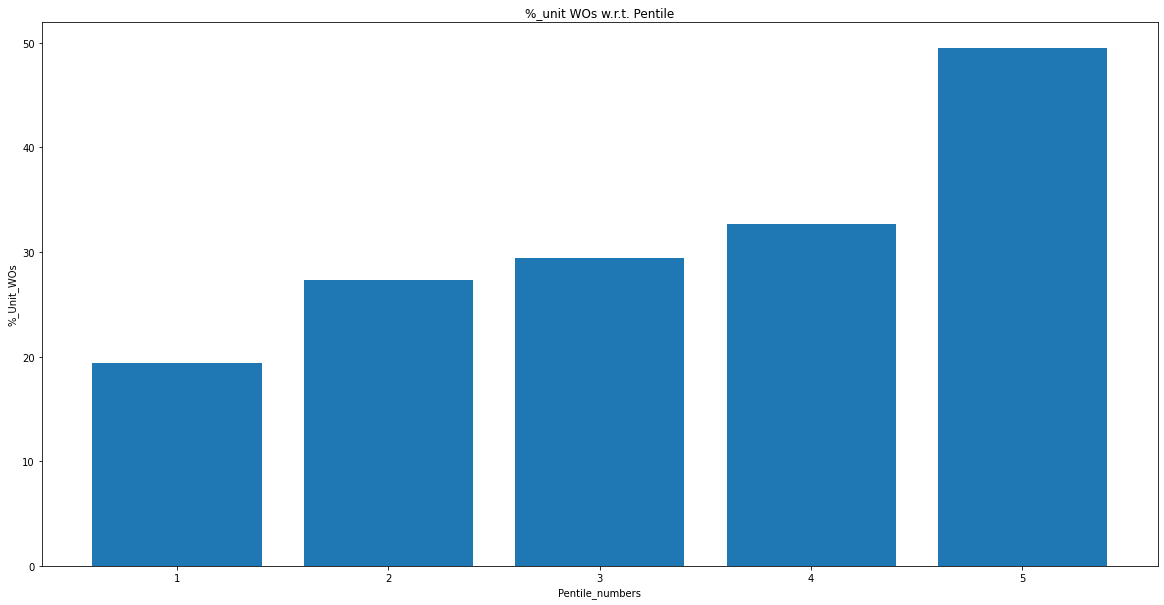

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Pentile")
plt.bar(final_df['Pentile'],final_df['%_Unit_WriteOff'])

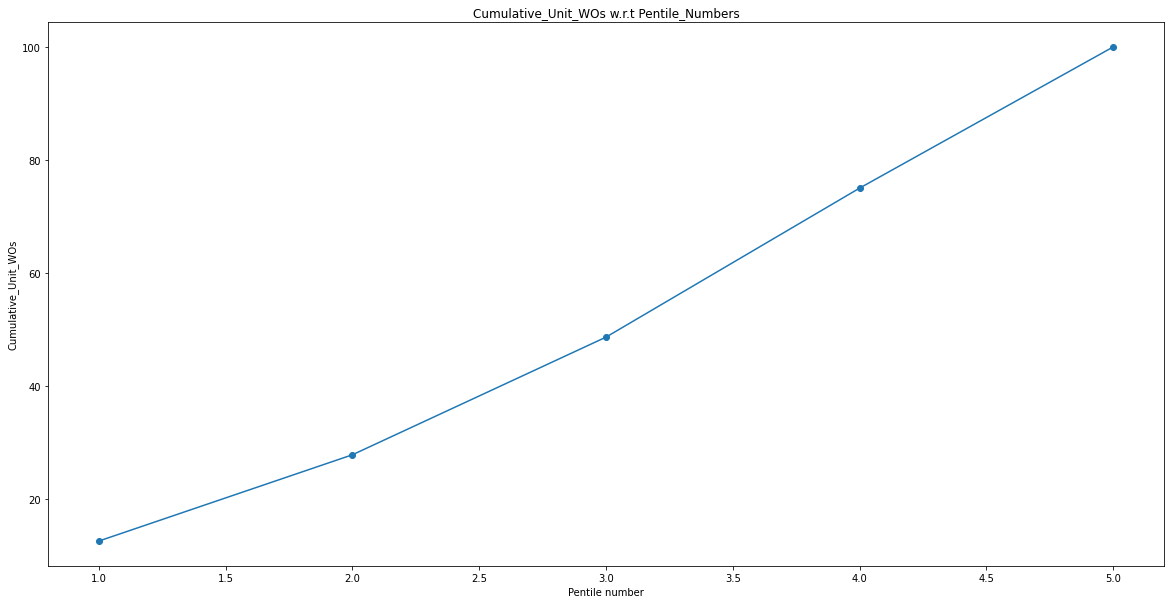

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Pentile_Numbers")
plt.plot(final_df["Pentile"], final_df['Cumulative_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

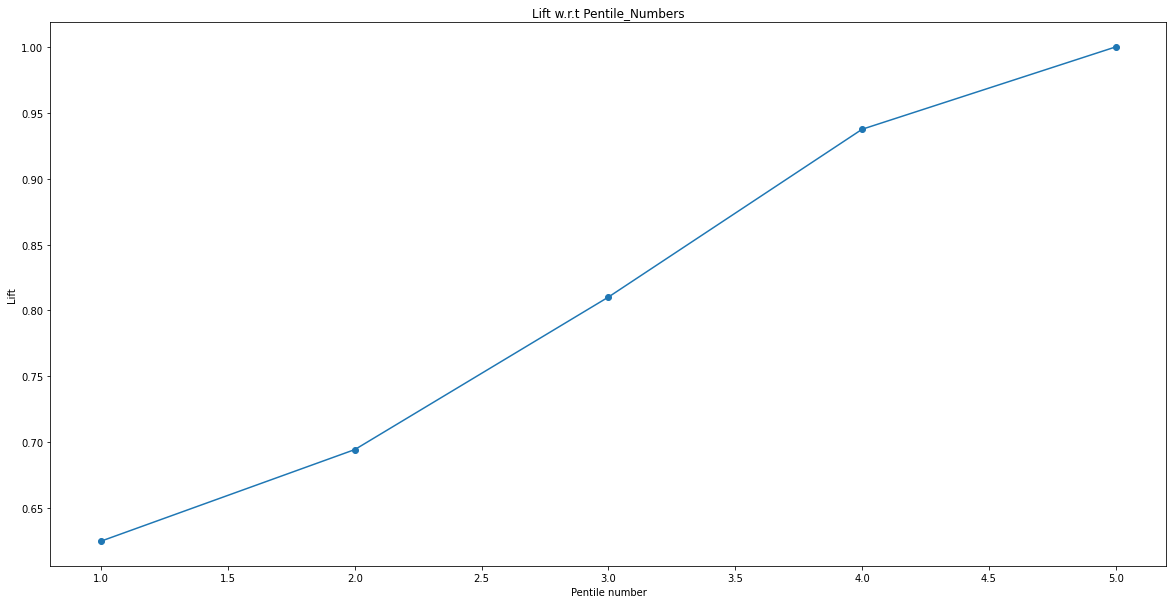

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile number")
plt.ylabel("Lift")
plt.title("Lift w.r.t Pentile_Numbers")
plt.plot(final_df["Pentile"], final_df['Lift'],marker='o')